##### Simple Linear Regression

In this notebook,our goal is to build and interpret a regression model to predict Sales from advertising spend on TV, Radio, and Newspaper.

##### Step1: Reading and understanding the Data 

1. Importing data using pandas library 
2. Understanding the structure of the data

In [5]:
# # Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# statsmodels	0.14.4
# sklearn	1.5.2

In [6]:
# Importing numpy and pandas packages

import numpy as np
import pandas as pd

In [7]:
# Read the csv file

advertising = pd.read_csv('advertising.csv')

In [8]:
#Checking the head of the records

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
# Let's inspect various aspect of dataframe

In [10]:
advertising.shape

(200, 4)

In [11]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##### Step2: Visualising the data

Lets first visualise the data using seaborn.

Now will check using pairplot which variable is most correlated with Sales


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Plotting pair plot

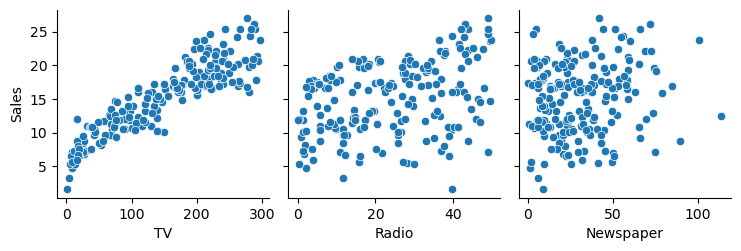

In [17]:
sns.pairplot(advertising, x_vars = ('TV', 'Radio', 'Newspaper'), y_vars= 'Sales')
plt.show()

In [18]:
# Plotting heat map

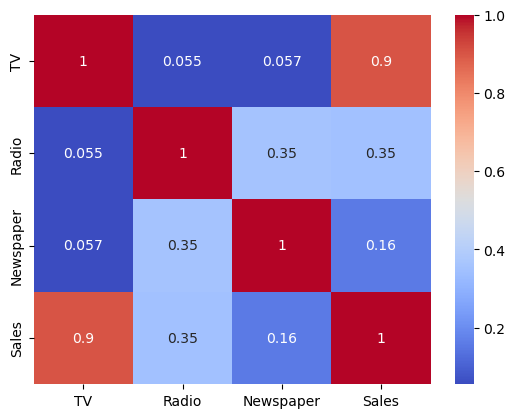

In [19]:
sns.heatmap(advertising.corr(), cmap= 'coolwarm', annot =True)
plt.show()

From the pair plot and heat map it can be seen that TV is most correlated with Sales.

So will go ahead and perform linear regression using TV as feature variable

##### Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

##### Generic steps in Model building using Statsmodel

First assign feature variable 'TV' to the variable 'X'

Reponse variable 'Sales' to the variable 'y'

In [24]:
X = advertising['TV']
y= advertising['Sales']

##### Train-test split

Split our variable to train_test sets.

Import train_test_split from sklearn.model_selection libary

It is best practice to keep 70% data to train set and 30% data in test set

In [27]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [28]:
# Splitting the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7 , test_size =0.3, random_state =100)

In [29]:
# Checking the head of train data

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [30]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

##### Building a linear model

Importing statsmodel.api library to perform linear regression

In [33]:
import statsmodels.api as sm

By default, stasmodels fit a line on the dataset which passes through the origin.

But to get a intercept, we have to manually use add_constant attribute of statsmodel.

After adding add_constant to X_train dataset, we can fit line using OLS(Ordinary Least Squares) attributes of statsmodel.

In [35]:
# Adding a constant to get an intercept

X_train_sm = sm.add_constant(X_train)

In [36]:
# Fitting the regression line using OLS

lr = sm.OLS(y_train, X_train_sm).fit()

In [37]:
# Printing the parameters to get intercept and slope of the regression line

lr.params

const    6.948683
TV       0.054546
dtype: float64

In [38]:
# Performing a summary operations to get all the different parameters of regession line

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.52e-52
Time:                        19:11:31   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

##### Looking at some key statistics from summary

The values we are concerned with are -

The coefficients and significance (p-values)

R-squared

F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value.

- The coefficient is statistically significant. So the association is not purely by chance.

- P-value for TV = 0.000 (very small):TV is highly statistically significant (strong evidence against null hypothesis).


##### 2. R - squared is 0.816

- This means 81.6% of the variance in Sales is explained by TV advertising spend alone.

- This is a decent R-squared value.

##### 3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

##### The fit is significant . Lets now visualise how well the model fit the data.

From the parameters we got, the equation of linear regression becomes:

$ Sales = 6.948 + 0.054 \times TV $

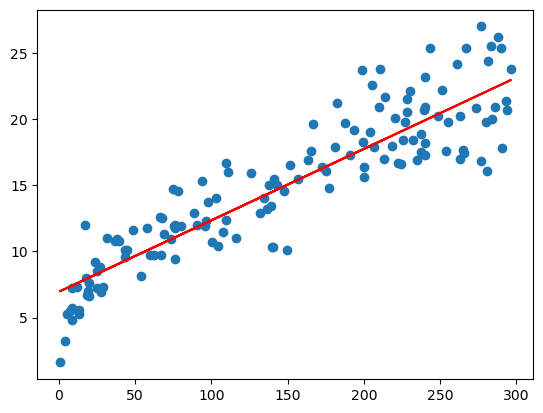

In [49]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948+ .054 * X_train, 'r')
plt.show()

##### Step:4 Residual analysis

To validate assumptions of the model, and hence the reliability for inference

##### Distribution of Error terms

- We need to check whether error terms are normally distributed (this is one of the major assumption of linear regression)
- Plotting a histogram to see how it looks like.


In [54]:
y_train_pred = lr.predict(X_train_sm)

res = y_train - y_train_pred

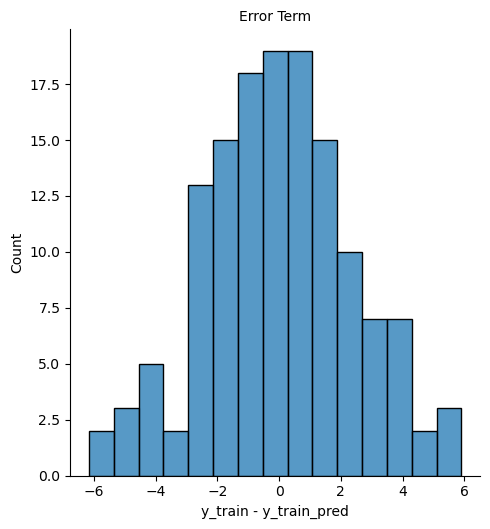

In [55]:
sns.displot(res, bins = 15)
plt.title('Error Term', fontsize=10)
plt.xlabel('y_train - y_train_pred')
plt.show()

The residual follow a normal distribution with mean =0. Assumption is correct.

##### Looking for pattern in residuals . Checking for homoscedesticity

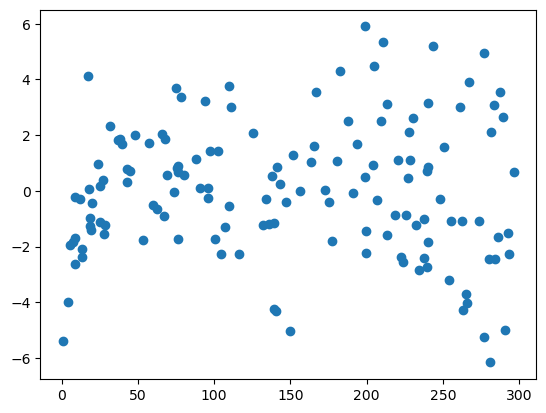

In [58]:
plt.scatter(X_train, res)
plt.show()

The variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

##### Understading from our evaluation :
- We can say that model fit is not by chance .
- The normality of residual terms allows some inference on the coefficients.
- Variance of residuals increasing with X (heteroscedesticity) indicates that there is significant variation that this model is unable to explain.
- Also, regression of line is very good fit to the data.

##### Step5: Prediction on the test data set

- As regression line is fitted on the train dataset, will now make some predictions on test datasets.
- Now adding constant to X_test data sets to get intercept and predcting corresponding y values.

In [63]:
# Adding constant to X_test 
X_test_sm = sm.add_constant(X_test)

In [64]:
# Predicting y values
y_test_pred = lr.predict(X_test_sm)

In [65]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [66]:
# Now will import mean_squared_error, r2_score from sklearn.metrics

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE 

In [69]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

2.019296008966232

On average, your model's predictions are about 2.02 units off from the actual sales values.

##### Checking r-squared on the test set

In [72]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245659

Model explains 79.2% of the variance in the Sales values on the test data.

##### Visualising fit on the test data

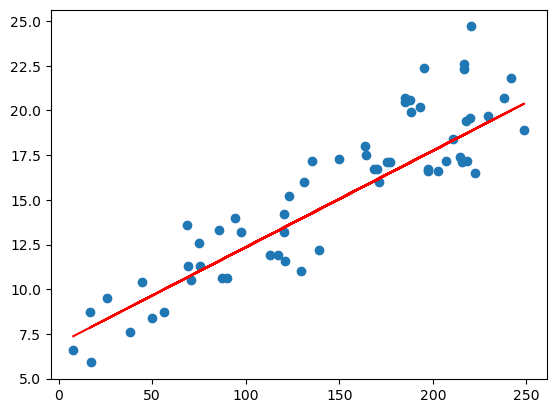

In [75]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r' )
plt.show()

##### Linear regression using linear model in sklearn

- Apart from statsmodel, there is another package sklearn that can be used to perform linear regression.
- Will use linear model library from sklearn to build the model.
- One steps we need to do is, there is single feature need to add additional column in order to fit linear regression

In [78]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

In [79]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size= .7, test_size=.3, random_state=100)

In [80]:
# checking shape
X_train_lm.shape

(140,)

In [81]:
y_train_lm.shape

(140,)

##### Since Scikit-learn expects 2D input for features so  reshape the feature to 2-D

In [83]:
X_train_lm = np.array(X_train_lm).reshape(-1,1)
X_test_lm = np.array(X_test_lm).reshape(-1,1)

In [84]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)


(140, 1)
(140,)
(60, 1)
(60,)


In [85]:
# importing LinearRegression from sklearn.linearmodel

from sklearn.linear_model import LinearRegression

In [86]:
# Representing linear regression as lm

lm = LinearRegression()

In [87]:
# fitting the model 

lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [88]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


##### The equation is same as we got before
Sales = 6.94 + .05 * TV

For every 1 unit ($1,000) increase in TV spend, Sales increase by ~0.0545 units (i.e., 54.5 units) on average

##### Why is it called 'R-squared'?

In [92]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


corrs[0, 1] is the Pearson correlation coefficient (r) between X_train and y_train.

In [94]:
corrs[0,1]**2

0.8157933136480384

0.81 coefficient of determination — R² This matches your earlier R² value from the model summary: 0.816

##### What is a good RMSE? Is there some RMSE that I should aim for?¶

The RMSE:

depends on the units of the Y variables
is NOT a normalized measure
While it can't really tell you of the gooodness of the particular model, it can help you compare models.

A better measure is R squared, which is normalized.

 ##### Does scaling have an impact on the model? When should I scale?

These algorithms are sensitive to feature scales, because they rely on:

- Distance-based calculations (e.g., Euclidean distance)

- Gradient descent optimization

##### What Does Scaling Actually Do?

| Method             | Effect                                        |
| ------------------ | --------------------------------------------- |
| **StandardScaler** | Transforms features to have mean = 0, std = 1 |
| **MinMaxScaler**   | Rescales features to range \[0, 1]            |


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
#train test split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [103]:
X_train.shape

(140,)

In [104]:
y_train.shape

(140,)

##### Sklearn has scaling utilities handy

In [106]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [107]:
# One thing to remember fit_transform can only be done on 2D-array
# reshaping the data to perfrom standardisation 

In [108]:
X_train_scaled = np.array(X_train).reshape(-1,1)
y_train_scaled = np.array(y_train).reshape(-1,1)

In [109]:
X_train_scaled.shape

(140, 1)

In [110]:
y_train_scaled.shape

(140, 1)

In [111]:
# creating a scaler object using StandardScaler
scaler = StandardScaler()

In [112]:
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [113]:
print(np.mean(X_train_scaled), np.std(X_train_scaled)) 
print(np.mean(y_train_scaled), np.std(y_train_scaled))

2.5376526277146434e-17 0.9999999999999999
-2.5376526277146434e-16 1.0


These values are extremely close to zero mean and unit variance, which is exactly what we expect

In [115]:
# Let's fit the regression line following exactly the same steps as done before

In [116]:

X_train_scaled = sm.add_constant(X_train_scaled)

In [117]:
lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [118]:
# Checking the parameters
lr_scaled.params

array([-2.91433544e-16,  9.03212773e-01])

In [119]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.52e-52
Time:                        19:11:33   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.914e-16      0.037  -7.98e-15      1.0

##### Model statistics and goodness of fit remain unchanged.¶
So why scale at all?
- Helps with interpretation 
- Faster convergence of gradient descent

##### OLS Regression Summary Conclusion

##### Model Fit:

R-squared = 0.816: The model explains 81.6% of the variance in the dependent variable (y). This indicates a strong linear relationship between the predictor (x1) and the outcome.

Adjusted R-squared = 0.814: After adjusting for the number of predictors, the model still explains about 81.4% of the variation, indicating minimal overfitting and a well-generalized model.

##### Statistical Significance:

F-statistic = 611.2, p-value = 1.52e-52: The overall model is highly statistically significant, meaning the predictor (x1) contributes meaningfully to explaining the variance in the target variable.

The coefficient for x1 is 0.9032 with a very low p-value (0.000), indicating that this feature has a strong and statistically significant positive effect on y.

##### Intercept (const):

The intercept is essentially 0 (-2.914e-16) and not statistically significant (p = 1.000), suggesting that when x1 = 0, the predicted value of y is also very close to 0, though the intercept itself does not meaningfully contribute to the model.

##### Residual Diagnostics:

Durbin-Watson = 2.196: This is very close to 2, indicating no significant autocorrelation in the residuals.

Omnibus = 0.027, Prob(Omnibus) = 0.987 and Jarque-Bera = 0.150, Prob = 0.928: These values confirm that the residuals are normally distributed, which validates one of the key assumptions of linear regression.

##### Multicollinearity:

Condition Number = 1.00: Indicates no multicollinearity issues, as it’s very low (a value >30 might indicate multicollinearity problems).

##### Conclusion:
This is a well-fitting and statistically significant linear regression model. The predictor variable x1 has a strong and meaningful relationship with the dependent variable y. The assumptions of linear regression—linearity, independence, normality of residuals, and no multicollinearity—appear to be satisfied.